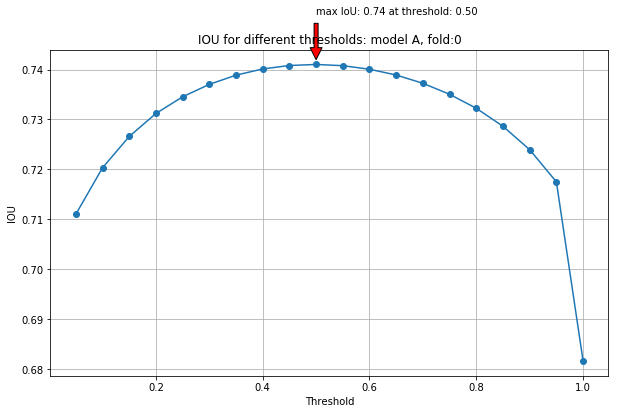

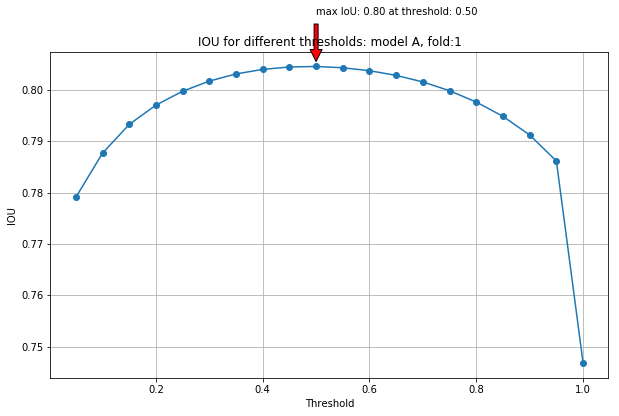

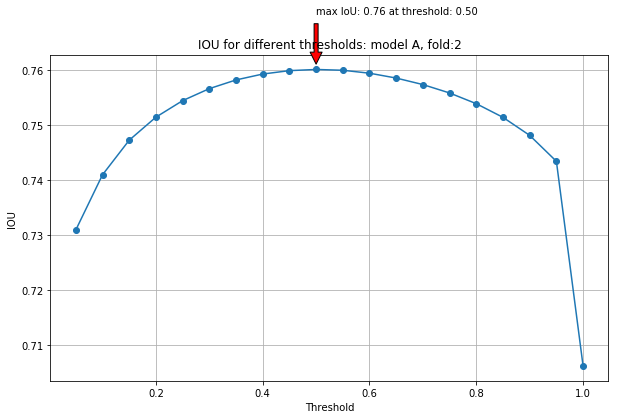

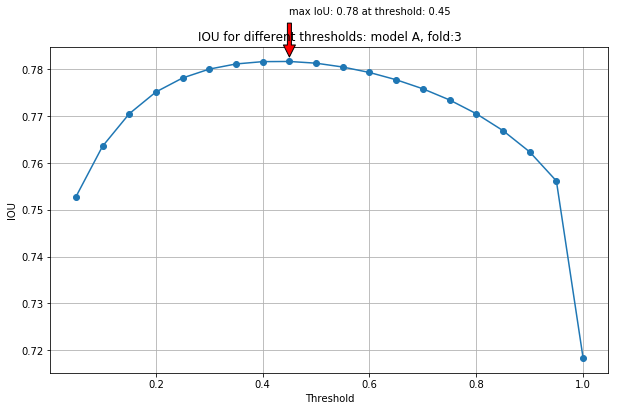

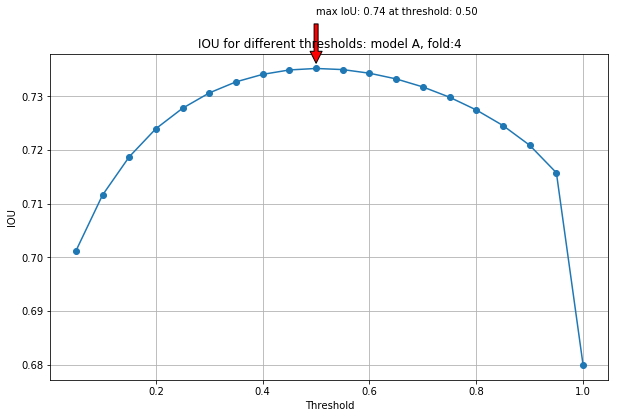

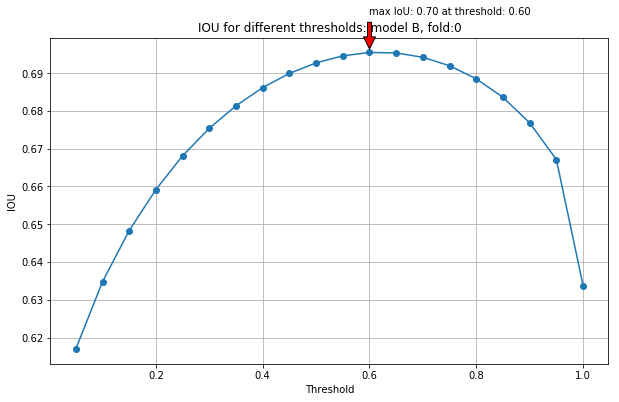

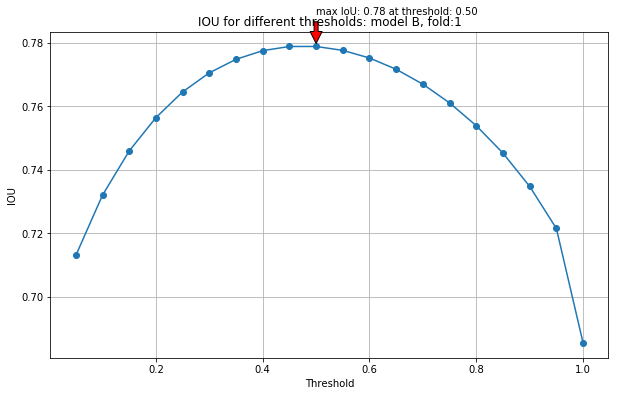

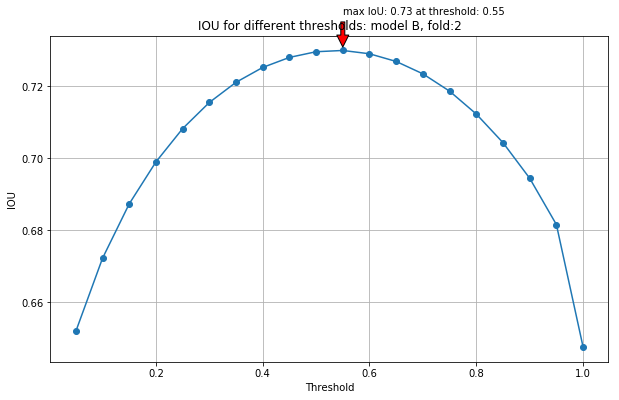

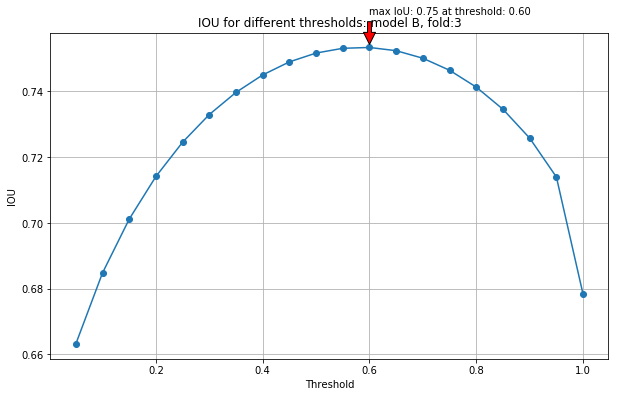

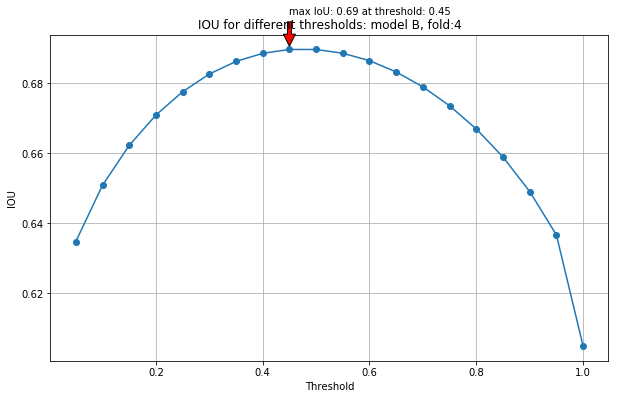

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

K=5
for n2 in range(2):
    for n3 in range(K):
        threshs = np.arange(0.05, 1.05, 0.05)
        if n2 == 0:
            ious = torch.load('Result/step1_4/PlaNet_S_A/f'+str(n3)+"_iou")
        elif n2 == 1:
            ious = torch.load('Result/step1_4/PlaNet_S_B/f'+str(n3)+"_iou")
        # Get the threshold and IoU for the maximum IoU
        max_iou_index = np.argmax(ious)
        max_iou_thresh = threshs[max_iou_index]
        max_iou = ious[max_iou_index]


        plt.figure(figsize=(10, 6))
        plt.plot(threshs, ious, marker='o')

        plt.annotate(f'max IoU: {max_iou:.2f} at threshold: {max_iou_thresh:.2f}', 
                     xy=(max_iou_thresh, max_iou), 
                     xytext=(max_iou_thresh, max_iou+0.01), # this makes the text location slightly above the point
                     arrowprops=dict(facecolor='red', shrink=0.1)) # this adds an arrow from the text to the point
        if n2 == 0:
            plt.title('IOU for different thresholds: model A, fold:' +str(n3))
        elif n2 == 1:
            plt.title('IOU for different thresholds: model B, fold:' +str(n3))            
        plt.xlabel('Threshold')
        plt.ylabel('IOU')
        plt.grid(True)

        plt.show()